### **INSTALL AND IMPORT REQUIRED PACKAGES**

In [1]:
!pip install biopython --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 39.3 MB/s eta 0:00:00


In [2]:
import os
import json
import sys
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from google.colab import drive
from sklearn.model_selection import train_test_split

print("Necessary packages installed and imported successfully.")

Necessary packages installed and imported successfully.


### **SET RANDOM SEED**

In [3]:
def set_all_seeds(seed=42):
    random.seed(seed)
    np.random.seed(seed)

set_all_seeds(42)
print("All seeds set for reproducibility.")

All seeds set for reproducibility.


### **MOUNT GOOGLE DRIVE AND SETUP PATHS**

In [4]:
drive.mount('/content/drive/', force_remount=True)

WORKDIR = "/content/drive/MyDrive/Colab Notebooks/Seminar-AMR/"
DATA_DIR = os.path.join(WORKDIR, "data")
CODE_SOURCE_DIR = os.path.join(WORKDIR, "src")
GENE_OUTPUT_DIR = os.path.join(DATA_DIR, "genes")
RESULT_DIR = os.path.join(WORKDIR, "results")
sys.path.append(WORKDIR)

# For local Jupyter Notebook
# WORKDIR = "./"
# DATA_DIR = "./data"
# RESULT_DIR = "./results"

os.makedirs(DATA_DIR, exist_ok=True)
os.makedirs(RESULT_DIR, exist_ok=True)

print(f"📁 Working directory: {WORKDIR}")
print(f"📁 Data directory: {DATA_DIR}")
print(f"📁 Results directory: {RESULT_DIR}")

Mounted at /content/drive/
📁 Working directory: /content/drive/MyDrive/Colab Notebooks/Seminar-AMR/
📁 Data directory: /content/drive/MyDrive/Colab Notebooks/Seminar-AMR/data
📁 Results directory: /content/drive/MyDrive/Colab Notebooks/Seminar-AMR/results


### **CUSTOM PACKAGE TO CREATE AND LOAD DATASET AND INITIAL PREPROCESSING**

Already provided as part of the [GitHub repository]( https://github.com/hzi-bifo/seminar-dlmb-2025-summer-public).

Training Sequence --> Mean: 1296.0, Median: 1296.0
Testing Sequence  --> Mean: 1296.0, Median: 1296.0
Training Label    --> Non-Resistant: 37, Resistant: 98
Testing Label     --> Non-Resistant: 3, Resistant: 12
Number of Samples --> Train data: 135, Test data: 15
First genome sequence in the train data:
TGAAAAATTTAATATCTATTATCATCATTTTATGTTTAACATTAAGTATTATGACACCATATGCACAAGCTGCTAACAGTGACGTAACCCCTGTACAAGCAGCAAATCAATATGGTTATGCAGGTTTGTCGGCTGCATACGAACCGACGAGTGCTGTTAATGTTAGTCAAACTGGACAATTACTGTATCAATACAATATCGATACTAAGTGGAATCCAGCGTCTATGACTAAATTAATGACAATGTACTTAACATTGGAAGCTGTAAATAAGGGGCAGCTTTCACTTGACGACACTGTCACAATGACGAACAAAGAATATATTATGTCTACACTACCTGAGTTGAGTAATACGAAACTATATCCTGGACAAGTATGGACAATCTCAGACCTATTACAAATTACGGTATCTAATTCTAGTAATGCCGCGGCATTAATTTTAGCTAAGAAGGTGTCAAAAAACACCAGCGATTTCGTTGATTTAATGAATAACAAAGCTAAAGCTATCGGAATGAAAAACACACATTTCGTCAATCCAACAGGTGCTGAAAATTCAAGATTACGTACATTTGCACCAACAAAGTATAAAGACCAAGAACGTACTGTAACGACTGCTAGAGACTATGCCATTTTAGATTTACACGTGATTAAAGAAACACCTAAAATATTAGACTTTACAAAGCAGTTAGCACCAACA

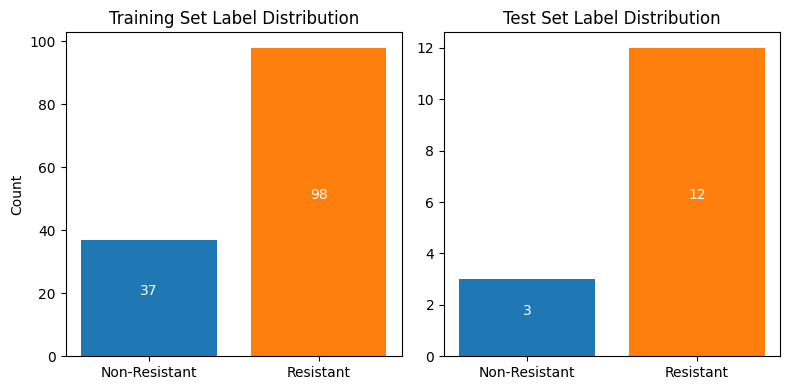

In [5]:
from src.amr_utility import load_gene_data, create_gene_datasets
from src.gene_data_util import train_test_split_seq, mean_median_calc, unique_value_count

create_gene_datasets(WORKDIR, GENE_OUTPUT_DIR)

seq_train = []
seq_test = []
y_train = []
y_test = []

data = load_gene_data(GENE_OUTPUT_DIR, 'Staphylococcus_aureus_cefoxitin', 'pbp4')

seq_train, y_train, seq_test, y_test = train_test_split_seq(data)

seq_train_mean, seq_train_median = mean_median_calc(seq_train)
seq_test_mean, seq_test_median = mean_median_calc(seq_test)
y_train_non_resistant, y_train_resistant = unique_value_count(y_train)
y_test_non_resistant, y_test_resistant = unique_value_count(y_test)

print(f"Training Sequence --> Mean: {seq_train_mean}, Median: {seq_train_median}")
print(f"Testing Sequence  --> Mean: {seq_test_mean}, Median: {seq_test_median}")
print(f"Training Label    --> Non-Resistant: {y_train_non_resistant}, Resistant: {y_train_resistant}")
print(f"Testing Label     --> Non-Resistant: {y_test_non_resistant}, Resistant: {y_test_resistant}")

print(f"Number of Samples --> Train data: {len(seq_train)}, Test data: {len(seq_test)}")

print('First genome sequence in the train data:\n{}'.format(seq_train[0]))
print('Length of the first genome sequence in the train data: {}'.format(len(seq_train[0])))
print('Label of the first genome sequence: {} -> non-resistant'.format(y_train[0]))

train_counts = [y_train_non_resistant, y_train_resistant]
test_counts = [y_test_non_resistant, y_test_resistant]
labels = ['Non-Resistant', 'Resistant']

fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Train Set
axes[0].bar(labels, train_counts, color = ['#1f77b4', '#ff7f0e'])
axes[0].set_title('Training Set Label Distribution')
axes[0].set_ylabel('Count')

for i, count in enumerate(train_counts):
    axes[0].text(i, count / 2, str(count), ha='center', va='bottom', fontsize=10, color="white")

# Test Set
axes[1].bar(labels, test_counts, color = ['#1f77b4', '#ff7f0e'])
axes[1].set_title('Test Set Label Distribution')

for i, count in enumerate(test_counts):
    axes[1].text(i, count / 2, str(count), ha='center', va='bottom', fontsize=10, color="white")

plt.tight_layout()
plt.show()

### **SAVE THE ORIGINAL DATA**

In [6]:
df_orig_train = pd.DataFrame({
    "sequence": seq_train,
    "label": y_train,
    "split": "train"
})

df_orig_test = pd.DataFrame({
    "sequence": seq_test,
    "label": y_test,
    "split": "test"
})

df_orig_all = pd.concat([df_orig_train, df_orig_test], ignore_index=True)
os.makedirs(RESULT_DIR, exist_ok=True)
filename = os.path.join(RESULT_DIR, "balanced_original_data.csv")
df_orig_all.to_csv(filename, index=False)

print(f"Saved all splits to {filename}")

Saved all splits to /content/drive/MyDrive/Colab Notebooks/Seminar-AMR/results/balanced_original_data.csv


### **UPSAMPLING THE DATA AND GENERATING VALIDATION SET**


After upsampling and split:
Training set    --> Total: 156, Resistant: 78, Non-resistant: 78
Validation set  --> Total: 40, Resistant: 20, Non-resistant: 20
Test set        --> Total: 15, Resistant: 12, Non-resistant: 3
CLASS DISTRIBUTION ANALYSIS:
Train: Non-Resistant=78, Resistant=78 | Non-Resistant Ratio: 0.500
Val:   Non-Resistant=20,   Resistant=20   | Non-Resistant Ratio: 0.500
Test:  Non-Resistant=3,  Resistant=12  | Non-Resistant Ratio: 0.800


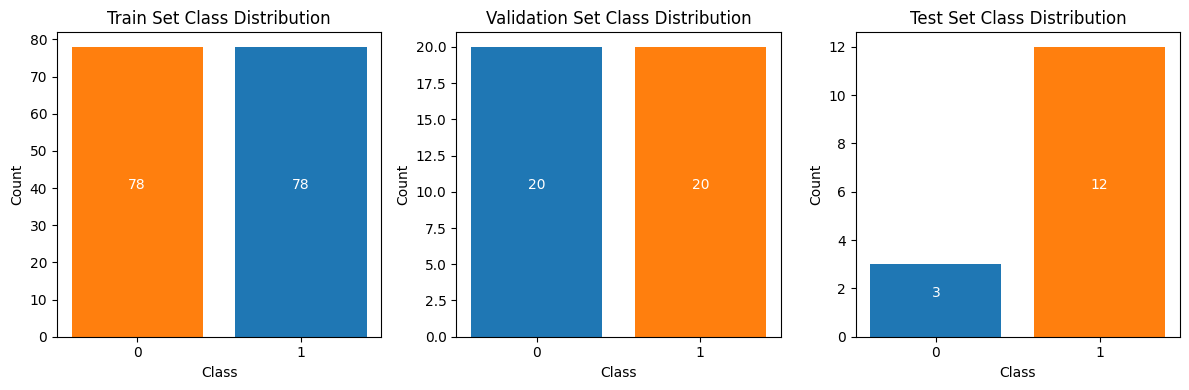

In [ ]:
resistant_seqs = [seq for seq, label in zip(seq_train, y_train) if label == 1]
non_resistant_seqs = [seq for seq, label in zip(seq_train, y_train) if label == 0]

resistant_count = len(resistant_seqs)
non_resistant_count = len(non_resistant_seqs)

upsampled_non_resistant = random.choices(non_resistant_seqs, k=resistant_count)

balanced_seqs = resistant_seqs + upsampled_non_resistant
balanced_labels = [1] * resistant_count + [0] * resistant_count

combined = list(zip(balanced_seqs, balanced_labels))
random.shuffle(combined)
balanced_seqs, balanced_labels = zip(*combined)

seq_train, seq_val, y_train, y_val = train_test_split(
    balanced_seqs, balanced_labels, test_size=0.20, random_state=42, stratify=balanced_labels
)

seq_train = list(seq_train)
seq_val = list(seq_val)
y_train = list(y_train)
y_val = list(y_val)

# Print class counts for verification
print(f"\nAfter upsampling and split:")
print(f"Training set    --> Total: {len(seq_train)}, Resistant: {y_train.count(1)}, Non-resistant: {y_train.count(0)}")
print(f"Validation set  --> Total: {len(seq_val)}, Resistant: {y_val.count(1)}, Non-resistant: {y_val.count(0)}")
print(f"Test set        --> Total: {len(seq_test)}, Resistant: {y_test.count(1)}, Non-resistant: {y_test.count(0)}")

print("CLASS DISTRIBUTION ANALYSIS:")
train_dist = Counter(y_train)
val_dist = Counter(y_val)
test_dist = Counter(y_test)

print(f"Train: Non-Resistant={train_dist[0]}, Resistant={train_dist[1]} | Non-Resistant Ratio: {train_dist[1]/(train_dist[0]+train_dist[1]):.3f}")
print(f"Val:   Non-Resistant={val_dist[0]},   Resistant={val_dist[1]}   | Non-Resistant Ratio: {val_dist[1]/(val_dist[0]+val_dist[1]):.3f}")
print(f"Test:  Non-Resistant={test_dist[0]},  Resistant={test_dist[1]}  | Non-Resistant Ratio: {test_dist[1]/(test_dist[0]+test_dist[1]):.3f}")

def plot_class_distribution_subplot(ax, counts, title):
    ax.bar(counts.keys(), counts.values(), color = ['#1f77b4', '#ff7f0e'])
    ax.set_xticks([0, 1])
    ax.set_xlabel('Class')
    ax.set_ylabel('Count')
    ax.set_title(title, fontsize=12)
    for i, val in counts.items():
        ax.text(i, val/2, str(val), ha='center', va='bottom', fontsize=10, color='white')
    ax.grid(False)

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

plot_class_distribution_subplot(axes[0], train_dist, "Train Set Class Distribution")
plot_class_distribution_subplot(axes[1], val_dist, "Validation Set Class Distribution")
plot_class_distribution_subplot(axes[2], test_dist, "Test Set Class Distribution")

plt.tight_layout()
plt.show()

### **SAVE THE DATA**

In [ ]:
df_train = pd.DataFrame({
    "sequence": seq_train,
    "label": y_train,
    "split": "train"
})
df_val = pd.DataFrame({
    "sequence": seq_val,
    "label": y_val,
    "split": "val"
})
df_test = pd.DataFrame({
    "sequence": seq_test,
    "label": y_test,
    "split": "test"
})

df_all = pd.concat([df_train, df_val, df_test], ignore_index=True)
os.makedirs(RESULT_DIR, exist_ok=True)
filename = os.path.join(RESULT_DIR, "balanced_data.csv")
df_all.to_csv(filename, index=False)

print(f"Saved all splits to {filename}")

Saved all splits to /content/drive/MyDrive/Colab Notebooks/Seminar-AMR/results/balanced_data.csv
